In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#connection
conn = sql.connect('database1.sqlite')
conn

In [ ]:
# conn = sql.connect('data.sqlite')
# conn

In [3]:
pd.read_sql_query("select * from Salaries", conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [4]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

### operators

In [5]:
# Show jobtitle where overtimepay > 50k and excluded 'not provided' rows
q = '''select jobtitle, overtimepay from Salaries
        where overtimepay > 50000
        and
        overtimepay != 'Not Provided'
'''

sql_query(q)

,JobTitle,OvertimePay
0,CAPTAIN III (POLICE DEPARTMENT),245131.88
1,CAPTAIN III (POLICE DEPARTMENT),106088.18
2,WIRE ROPE CABLE MAINTENANCE MECHANIC,56120.71
3,"BATTALION CHIEF, (FIRE DEPARTMENT)",89062.90
4,"BATTALION CHIEF, (FIRE DEPARTMENT)",86362.68
...,...,...
2160,Transit Operator,51625.42
2161,Transit Operator,52550.53
2162,Track Maintenance Worker,50265.23
2163,Diagnostic Imaging Tech I,74935.96


In [6]:
# Show All Employess With A Total Pay Between 50,000 and 75,000
q = '''select employeename, totalpay from salaries
    where totalpay > 50000 and totalpay < 75000
    '''

sql_query(q)

,EmployeeName,TotalPay
0,MAMIKO NAKAMURA,74999.62
1,HEDLEY PRINCE,74998.73
2,LINDA BARNARD,74998.30
3,ANGELA WHITTAKER,74997.84
4,JANE CHU,74997.81
...,...,...
33552,Stephanie Reidy,51785.23
33553,Maria Theresa Luna,52266.82
33554,Paul E Maltzer,51673.98
33555,Kevin I Dolar,50953.19


In [7]:
# Show All Employess With A Total Pay Between 50,000 and 75,000
q = '''select employeename, totalpay from salaries
    where totalpay between 50000 and 75000'''

sql_query(q)

,EmployeeName,TotalPay
0,MAMIKO NAKAMURA,74999.62
1,HEDLEY PRINCE,74998.73
2,LINDA BARNARD,74998.30
3,ANGELA WHITTAKER,74997.84
4,JANE CHU,74997.81
...,...,...
33552,Stephanie Reidy,51785.23
33553,Maria Theresa Luna,52266.82
33554,Paul E Maltzer,51673.98
33555,Kevin I Dolar,50953.19


In [9]:
# Show All Employees With A BasePay less than 50,000 Or A TotalPay Greater Than 100,000
q = '''select employeename, basepay, totalpay from Salaries
    where basepay < 50000 
    or
    totalpay > 100000
    order by 3 desc
    limit 10'''

sql_query(q)

,EmployeeName,BasePay,TotalPay
0,NATHANIEL FORD,167411.18,567595.43
1,GARY JIMENEZ,155966.02,538909.28
2,David Shinn,129150.01,471952.64
3,Amy P Hart,318835.49,390111.98
4,Gary Altenberg,128808.87,362844.66
5,John Goldberg,104404.00,350403.41
6,Samson Lai,186236.42,347102.32
7,Ellen G Moffatt,270222.04,344187.46
8,William J Coaker Jr.,257340.00,339653.70
9,Gregory P Suhr,319275.01,339282.07


In [10]:
# Show All Employees With A BasePay less than 50,000 Or A TotalPay Greater Than 100,000
q = '''select employeename, basepay, totalpay from Salaries
    order by 3 desc
    limit 10
    where basepay < 50000 
    or
    totalpay > 100000
    '''

sql_query(q)

DatabaseError: Execution failed on sql 'select employeename, basepay, totalpay from Salaries
    order by 3 desc
    limit 10
    where basepay < 50000 
    or
    totalpay > 100000
    ': near "where": syntax error

In [11]:
# Show All Employees With A BasePay less than 50,000 Or A TotalPay Greater Than 100,000
q = '''select employeename, basepay, totalpay from Salaries
    order by 3 desc
    where basepay < 50000 
    or
    totalpay > 100000
    '''

sql_query(q)

DatabaseError: Execution failed on sql 'select employeename, basepay, totalpay from Salaries
    order by 3 desc
    where basepay < 50000 
    or
    totalpay > 100000
    ': near "where": syntax error

### Aggregate functions

In [14]:
q = '''select count(*) from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
'''

sql_query(q)

,count(*)
0,37


In [15]:
q = '''select count(jobtitle) from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
'''

sql_query(q)

,count(jobtitle)
0,37


In [16]:
q = '''select count(jobtitle) 'Captain Count' from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
'''

sql_query(q)

,Captain Count
0,37


In [13]:
q = '''select count from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
'''

sql_query(q)

DatabaseError: Execution failed on sql 'select count from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
': no such column: count

In [17]:
#average

q = '''select avg 'avergae TP of Custodian' from Salaries where jobtitle = 'Custodian'
'''

sql_query(q)

DatabaseError: Execution failed on sql 'select avg 'avergae TP of Custodian' from Salaries where jobtitle = 'Custodian'
': no such column: avg

In [19]:
#average

q = '''select avg(totalpay) 'avergae TP of Custodian' from Salaries where jobtitle = 'Custodian'
'''

sql_query(q)

,avergae TP of Custodian
0,47070.542419


In [20]:
#average

q = '''select avg(*) 'avergae TP of Custodian' from Salaries where jobtitle = 'Custodian'
'''

sql_query(q)

DatabaseError: Execution failed on sql 'select avg(*) 'avergae TP of Custodian' from Salaries where jobtitle = 'Custodian'
': wrong number of arguments to function avg()

In [21]:
#max 

q = '''select max(totalpay) from Salaries'''

sql_query(q)

,max(totalpay)
0,567595.43


In [22]:
#max 

q = '''select max(totalpay), employeename from Salaries'''

sql_query(q)

,max(totalpay),EmployeeName
0,567595.43,NATHANIEL FORD


In [23]:
#max 

q = '''select max(totalpay), employeename, jobtitle from Salaries'''

sql_query(q)

,max(totalpay),EmployeeName,JobTitle
0,567595.43,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY


In [24]:
# How many employees in the salaries table have OvertimePay equal to 0?
q = '''select count(employeename) from salaries where overtimepay = 0
'''

sql_query(q)

,count(employeename)
0,77321


In [25]:
# How many employees in the salaries table have OvertimePay equal to 0?
q = '''select * from salaries where overtimepay = 0
'''

sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0,51322.50,,307899.46,307899.46,2011,,San Francisco,
2,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262,0,17115.73,,302377.73,302377.73,2011,,San Francisco,
3,13,EDWARD HARRINGTON,EXECUTIVE CONTRACT EMPLOYEE,294580.02,0,0.00,,294580.02,294580.02,2011,,San Francisco,
4,14,JOHN MARTIN,DEPARTMENT HEAD V,271329.03,0,21342.59,,292671.62,292671.62,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77316,148646,Carolyn A Wilson,Human Services Technician,0,0,0.00,0,0.00,0.00,2014,,San Francisco,PT
77317,148648,Joann Anderson,Communications Dispatcher 2,0,0,0.00,0,0.00,0.00,2014,,San Francisco,PT
77318,148649,Leon Walker,Custodian,0,0,0.00,0,0.00,0.00,2014,,San Francisco,PT
77319,148650,Roy I Tillery,Custodian,0,0,0.00,0,0.00,0.00,2014,,San Francisco,PT


In [26]:
# How many employees in the salaries table have OvertimePay equal to 0?
q = '''select count(*) from salaries where overtimepay = 0
'''

sql_query(q)

,count(*)
0,77321


In [27]:
q = '''select * from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
'''
sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
1,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
2,12,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT),99722.00,87082.62,110804.30,,297608.92,297608.92,2011,,San Francisco,
3,62,ANNA BROWN,CAPTAIN III (POLICE DEPARTMENT),102571.24,7437.00,128543.64,,238551.88,238551.88,2011,,San Francisco,
4,66,RICHARD PARRY,CAPTAIN III (POLICE DEPARTMENT),185369.69,37873.61,14465.53,,237708.83,237708.83,2011,,San Francisco,
5,92,DONNA MEIXNER,CAPTAIN III (POLICE DEPARTMENT),102722.40,7437.00,118456.21,,228615.61,228615.61,2011,,San Francisco,
6,94,JOHN MURPHY,CAPTAIN III (POLICE DEPARTMENT),215914.03,0.00,12293.83,,228207.86,228207.86,2011,,San Francisco,
7,126,SHARON FERRIGNO,CAPTAIN III (POLICE DEPARTMENT),185369.68,27321.83,4651.44,,217342.95,217342.95,2011,,San Francisco,
8,212,CROCE CASCIATO,CAPTAIN III (POLICE DEPARTMENT),188341.62,0.00,16206.24,,204547.86,204547.86,2011,,San Francisco,
9,215,JOHN FEENEY,CAPTAIN III (POLICE DEPARTMENT),188348.55,5720.22,10173.43,,204242.20,204242.20,2011,,San Francisco,


In [28]:
q = '''select sum(overtimepay) from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
'''
sql_query(q)

,sum(overtimepay)
0,587353.74


### GROUP BY --- HAVING

GROUP BY works after the WHERE clause filters the rows and before the HAVING clause filters the groups.

- Count Employees by JobTitle
- Average TotalPay by JobTitle
- Employees with the Highest TotalPay in Each Year
- Sum of TotalPay by Year and JobTitle
- Employees with TotalPay Greater Than 1,000,000 by JobTitle
- Employees with Average BasePay Greater Than 50,000 by JobTitle
- Employee Count Greater Than 10 in Each Year
- Job Titles with More Than 5 Employees and Average TotalPay Greater Than 100,000

In [31]:
#Count Employees by JobTitle

q = '''select count(employeename) 'count of employeename', jobtitle from salaries
    group by 2
    '''

sql_query(q)

,count of employeename,JobTitle
0,83,ACCOUNT CLERK
1,5,ACCOUNTANT
2,48,ACCOUNTANT INTERN
3,1,"ACPO,JuvP, Juv Prob (SFERS)"
4,1,ACUPUNCTURIST
...,...,...
2154,26,X-RAY LABORATORY AIDE
2155,100,X-Ray Laboratory Aide
2156,1,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS"
2157,4,Youth Comm Advisor


In [32]:
#Count Employees by JobTitle

q = '''select count(jobtitle) 'count of employeename', employeename from salaries
    group by 1
    '''

sql_query(q)

DatabaseError: Execution failed on sql 'select count(jobtitle) 'count of employeename', employeename from salaries
    group by 1
    ': aggregate functions are not allowed in the GROUP BY clause

In [33]:
# Average TotalPay by JobTitle

q = '''select jobtitle, avg(totalpay) as AverageOfTotalPay from salaries
group by jobtitle
'''

sql_query(q)

,JobTitle,AverageOfTotalPay
0,ACCOUNT CLERK,44035.664337
1,ACCOUNTANT,47429.268000
2,ACCOUNTANT INTERN,29031.742917
3,"ACPO,JuvP, Juv Prob (SFERS)",62290.780000
4,ACUPUNCTURIST,67594.400000
...,...,...
2154,X-RAY LABORATORY AIDE,52705.880385
2155,X-Ray Laboratory Aide,50823.942700
2156,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000
2157,Youth Comm Advisor,41414.307500


In [34]:
# Average TotalPay by JobTitle

q = '''select jobtitle, avg(totalpay) as AverageOfTotalPay from salaries
group by jobtitle
order by 2 desc
limit 10
'''

sql_query(q)

,JobTitle,AverageOfTotalPay
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
1,Chief Investment Officer,339653.700000
2,Chief of Police,329183.646667
3,"Chief, Fire Department",325971.683333
4,DEPUTY DIRECTOR OF INVESTMENTS,307899.460000
5,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.730000
6,"Gen Mgr, Public Trnsp Dept",297769.413333
7,Asst Chf of Dept (Fire Dept),281763.483889
8,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",279359.560000
9,"Dep Dir for Investments, Ret",278592.545000


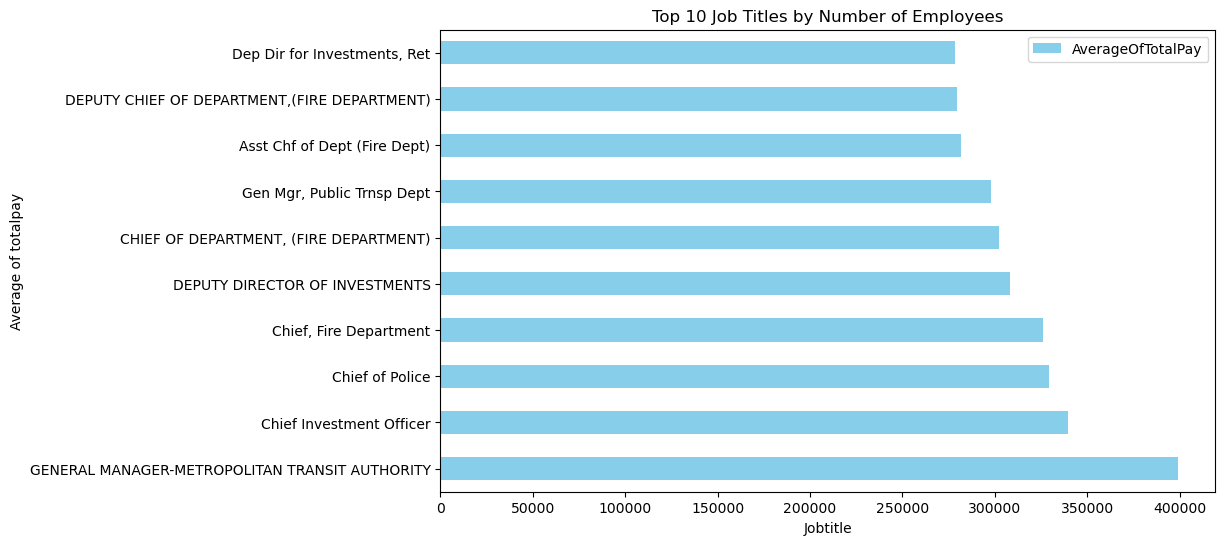

In [36]:
a = pd.read_sql_query(q, conn)
a.plot(kind='barh', x='JobTitle', y='AverageOfTotalPay', color='skyblue', figsize=(10, 6))

plt.xlabel('Jobtitle')
plt.ylabel('Average of totalpay')
plt.title('Top 10 Job Titles by Number of Employees')

plt.show()


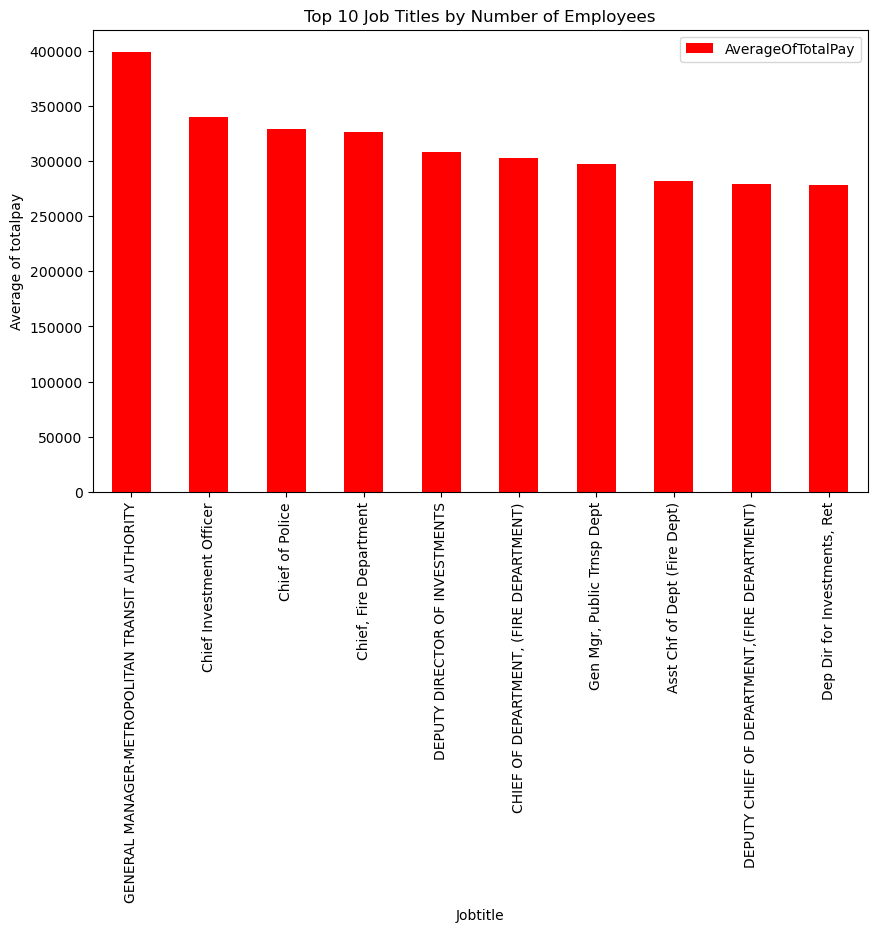

In [42]:
a = pd.read_sql_query(q, conn)
a.plot(kind='bar', x='JobTitle', y='AverageOfTotalPay', color='red', figsize=(10, 6))

plt.xlabel('Jobtitle')
plt.ylabel('Average of totalpay')
plt.title('Top 10 Job Titles by Number of Employees')

plt.show()

In [44]:
# Employees with TotalPay Greater Than 1,000,000 by JobTitle

q = '''select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    group by 2
    having totalpay > 100000
    '''

sql_query(q)

,count of employeename,JobTitle,TotalPay
0,10,ADMINISTRATIVE ENGINEER,149322.23
1,1,"ADMINISTRATOR, SFGH MEDICAL CENTER",257124.44
2,27,AIRPORT COMMUNICATIONS OPERATOR,106776.25
3,13,AIRPORT ECONOMIC PLANNER,111811.72
4,17,AIRPORT ELECTRICIAN,118617.32
...,...,...,...
941,82,Water Service Inspector,122666.75
942,38,Welder,132307.93
943,30,Wire Rope Cable Maint Mechanic,174293.82
944,3,Wire Rope Cable Maint Sprv,224833.47


In [45]:
q = '''select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    having totalpay > 100000
    group by 2
    '''

sql_query(q)

DatabaseError: Execution failed on sql 'select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    having totalpay > 100000
    group by 2
    ': near "group": syntax error

In [46]:
q = '''select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    where totalpay > 100000
    group by 2
    '''

sql_query(q)

,count of employeename,JobTitle,TotalPay
0,9,ADMINISTRATIVE ENGINEER,149322.23
1,1,"ADMINISTRATOR, SFGH MEDICAL CENTER",257124.44
2,3,AIRPORT COMMUNICATIONS OPERATOR,106776.25
3,13,AIRPORT ECONOMIC PLANNER,111811.72
4,14,AIRPORT ELECTRICIAN,118617.32
...,...,...,...
1055,14,Welder,132307.93
1056,20,Wire Rope Cable Maint Mechanic,174293.82
1057,3,Wire Rope Cable Maint Sprv,224833.47
1058,4,Worker's Comp Supervisor 1,101722.05


In [47]:
q = '''select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    group by 2
    where totalpay > 100000

    '''

sql_query(q)

DatabaseError: Execution failed on sql 'select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    group by 2
    where totalpay > 100000

    ': near "where": syntax error

In [48]:
# Employees with Average BasePay Greater Than 50,000 by JobTitle

q = '''select avg(basepay), jobtitle, employeename from salaries
    group by 2'''

sql_query(q)

,avg(basepay),JobTitle,EmployeeName
0,43300.806506,ACCOUNT CLERK,NAPOLEON VIRAY
1,46643.172000,ACCOUNTANT,CARLITO NEPACENA
2,28732.663958,ACCOUNTANT INTERN,PENG HUANG
3,62290.780000,"ACPO,JuvP, Juv Prob (SFERS)",Palminder K Hernandez
4,66374.400000,ACUPUNCTURIST,WEN XU
...,...,...,...
2154,47664.773077,X-RAY LABORATORY AIDE,DELBERT LEE
2155,46086.387100,X-Ray Laboratory Aide,Delbert Lee
2156,52609.910000,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",MARIO YEDIDIA
2157,39077.957500,Youth Comm Advisor,Mario Yedidia


In [49]:
# Employees with Average BasePay Greater Than 50,000 by JobTitle

q = '''select avg(basepay), jobtitle from salaries
    group by 2
    having avg(basepay) > 50000'''

sql_query(q)

,avg(basepay),JobTitle
0,62290.780000,"ACPO,JuvP, Juv Prob (SFERS)"
1,66374.400000,ACUPUNCTURIST
2,63435.628602,ADMINISTRATIVE ANALYST
3,59373.710000,ADMINISTRATIVE ANALYST II
4,92698.515000,ADMINISTRATIVE ANALYST III
...,...,...
1721,61475.267333,Wire Rope Cable Maint Mechanic
1722,92751.746667,Wire Rope Cable Maint Sprv
1723,68867.296429,Worker's Comp Supervisor 1
1724,72363.278784,Worker's Compensation Adjuster


In [50]:
# Employees with Average BasePay Greater Than 50,000 by JobTitle

q = '''select basepay, jobtitle from salaries
    group by 2
    having avg(basepay) > 50000'''

sql_query(q)

,BasePay,JobTitle
0,62290.78,"ACPO,JuvP, Juv Prob (SFERS)"
1,66374.40,ACUPUNCTURIST
2,75306.30,ADMINISTRATIVE ANALYST
3,75585.82,ADMINISTRATIVE ANALYST II
4,92847.00,ADMINISTRATIVE ANALYST III
...,...,...
1721,80439.54,Wire Rope Cable Maint Mechanic
1722,88634.01,Wire Rope Cable Maint Sprv
1723,101242.05,Worker's Comp Supervisor 1
1724,81144.38,Worker's Compensation Adjuster
